In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression using Normal Equation

In [15]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

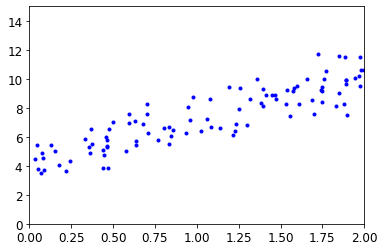

In [16]:
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [17]:
X_b = np.c_[np.ones((100,1)),X] #add x0=1 (bias term)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.20082931],
       [3.00152994]])

In [23]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.20082931],
       [10.2038892 ]])

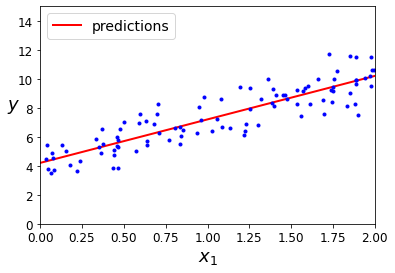

In [27]:
plt.plot(X_new,y_pred,"r-",linewidth=2,label="predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.legend(loc="upper left",fontsize=14)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.20082931]), array([[3.00152994]]))

In [30]:
y_pred = lin_reg.predict(X_new)
y_pred

array([[ 4.20082931],
       [10.2038892 ]])

# Linear Regression using Batch Gradient Decent

In [31]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [32]:
theta

array([[4.20082931],
       [3.00152994]])

In [33]:
X_new_b.dot(theta)

array([[ 4.20082931],
       [10.2038892 ]])

# Stochastic Gradient decent

In [35]:
from sklearn.linear_model import SGDRegressor

sgd_clf = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1,
                      random_state=42)
sgd_clf.fit(X,y)

/Users/swatikar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [37]:
sgd_clf.intercept_,sgd_clf.coef_

(array([4.10310157]), array([2.90894898]))

# Polynomial Regression

In [38]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [41]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

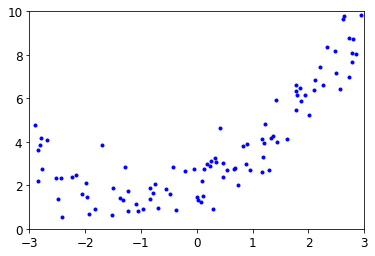

In [44]:
plt.plot(X,y,"b.")
plt.axis([-3,3,0,10])
plt.show()

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.76886782])

In [47]:
X_poly[0]

array([1.76886782, 3.12889337])

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99958228]), array([[1.04630034, 0.5015459 ]]))

In [52]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
# X_new

Saving figure quadratic_predictions_plot


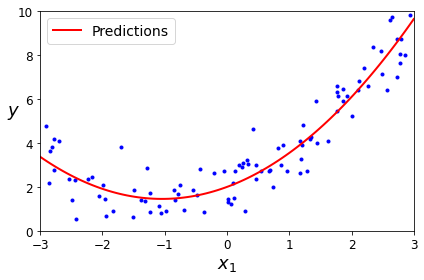

In [53]:
plt.plot(X,y,"b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

# Regularized models

In [54]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5*X + np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

In [56]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1,solver="cholesky",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [57]:
ridge_reg = Ridge(alpha=1,solver="sag",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [58]:
sgd_reg = SGDRegressor(penalty="l2",max_iter=1000,tol=1e-3,random_state=42)
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/Users/swatikar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1.47012588])

In [60]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

# Logistic Regression

In [61]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [65]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
X = iris["data"][:,3:] #petal width
y = (iris["target"] == 2).astype(np.int) #1 if Iris virginica

/Users/swatikar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [68]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

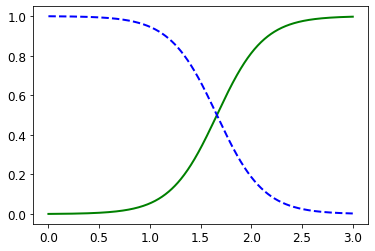

In [69]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new,y_proba[:,1],"g-",linewidth=2,label="Iris Virginica")
plt.plot(X_new,y_proba[:,0],"b--",linewidth=2,label="Not Iris Virginica")

In [70]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

If petal width is 1.7, then it is Virginica else not

In [71]:
X = iris["data"][:,(2,3)] #petal length,petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",random_state=42)
softmax_reg.fit(X,y)

LogisticRegression(multi_class='multinomial', random_state=42)

In [72]:
softmax_reg.predict([[5,2]])

array([2])

Array[2] is Virginica

In [73]:
softmax_reg.predict_proba([[5,2]])

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])

Here, we can see the probability of 3 classes. Array[2] has largest value. So the probabily of Varginica is largest

# Exercise

12. Implement Batch Gradient Descent with early stopping for Softmax Regression

In [149]:
X = iris["data"][:,(2,3)]
y = iris["target"]

In [150]:
X[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [151]:
X = np.c_[np.ones([len(X),1]),X]

In [152]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=42)

In [153]:
softmax_reg = LogisticRegression()
softmax_reg.fit(X_train,y_train)

LogisticRegression()

In [154]:
y_train[:10]

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0])

In [155]:
from sklearn.metrics import accuracy_score

y_pred = softmax_reg.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [158]:
# n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
# n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)
# print(n_inputs)
# print(n_outputs)

3
3


In [164]:
# eta = 0.1 #learning rate
# n_iterations = 1000
# m = len(X_train)

# theta = np.random.randn(n_inputs,n_outputs) #random initialization

# for iteration in range(n_iterations):
#     gradients = 2/m * X_train.T.dot(X_train.dot(theta)-n_outputs)
#     theta = theta - eta * gradients

/Users/swatikar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


In [1]:
# theta